<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Connect to Db2 database on Cloud using Python




Database credentials are required to connect from remote applications like Jupyter notebooks which are used in the labs and assignment in the last two weeks of the course.

Go to your IBM Cloud Resources dashboard (or click on IBM Cloud in the top left corner):
https://cloud.ibm.com/resources

Note: you may need to log into IBM Cloud in the process of loading the resources/dashboard.

If your connection is slow it may take over 30 seconds for the dashboard to fully load.

Locate and click on your Db2 service listed under Services.
(NOTE: In the example below the service is called “Db2-xx” but your Db2 service may have a different letters/numbers in the suffix e.g. “Db2-f8”, “Db-50”, etc.)

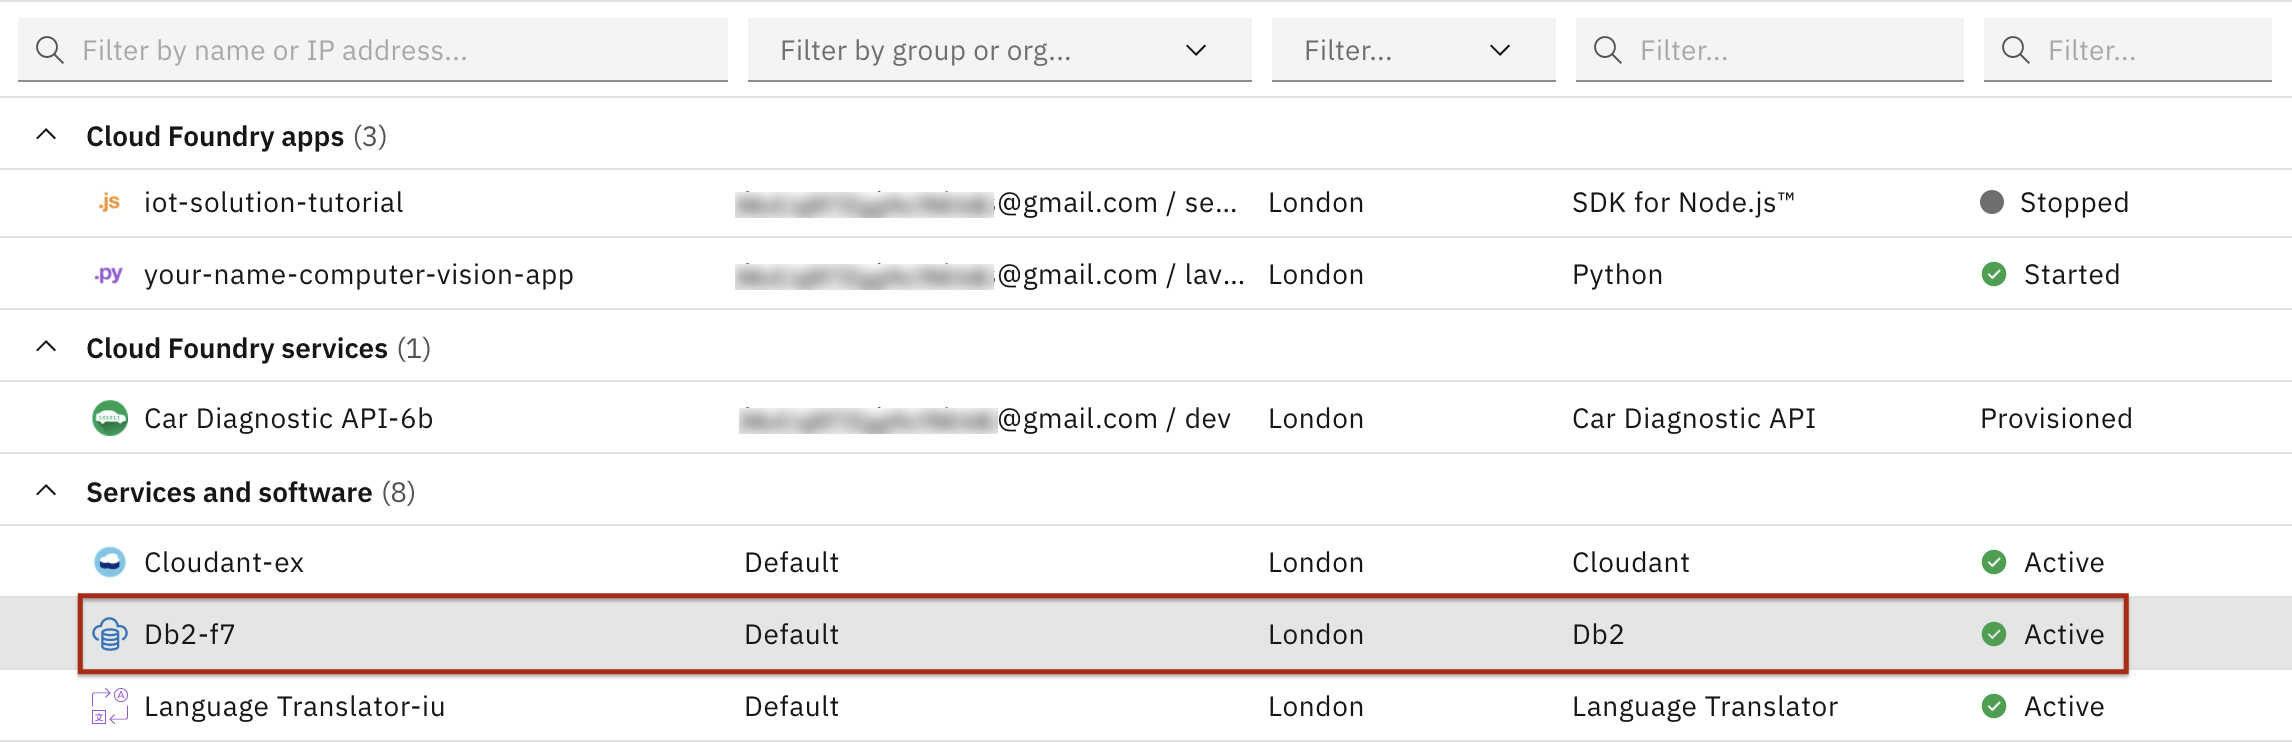

Click on Service Credentials in the left menu

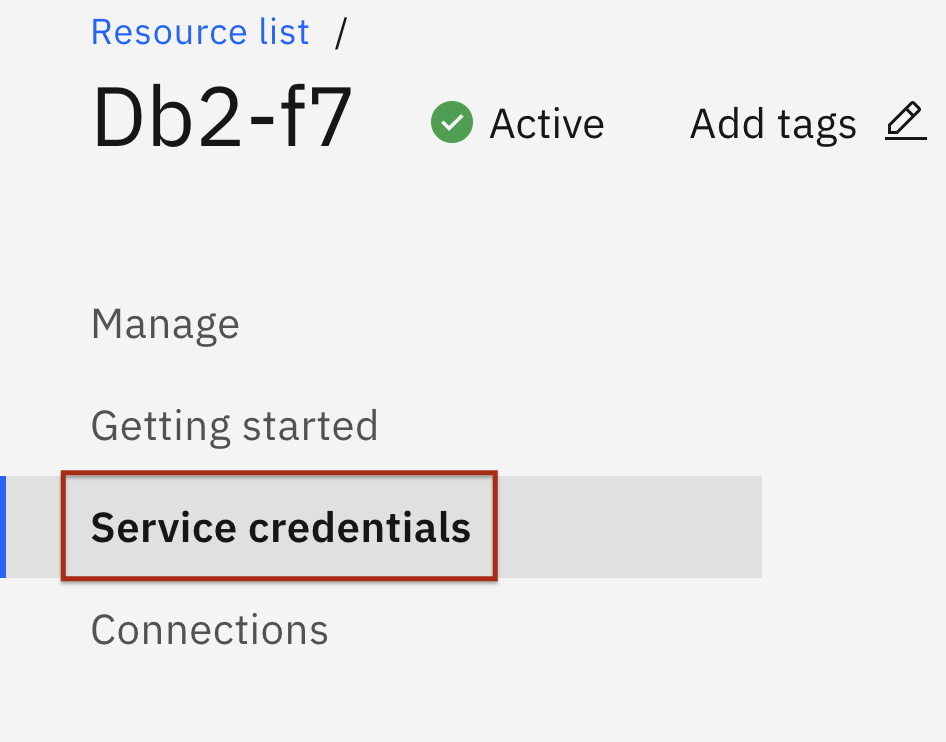

Click on the button to create New credential

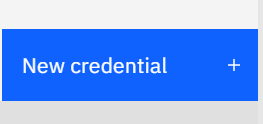

In the prompt that comes up click the “Add” button in the bottom right:

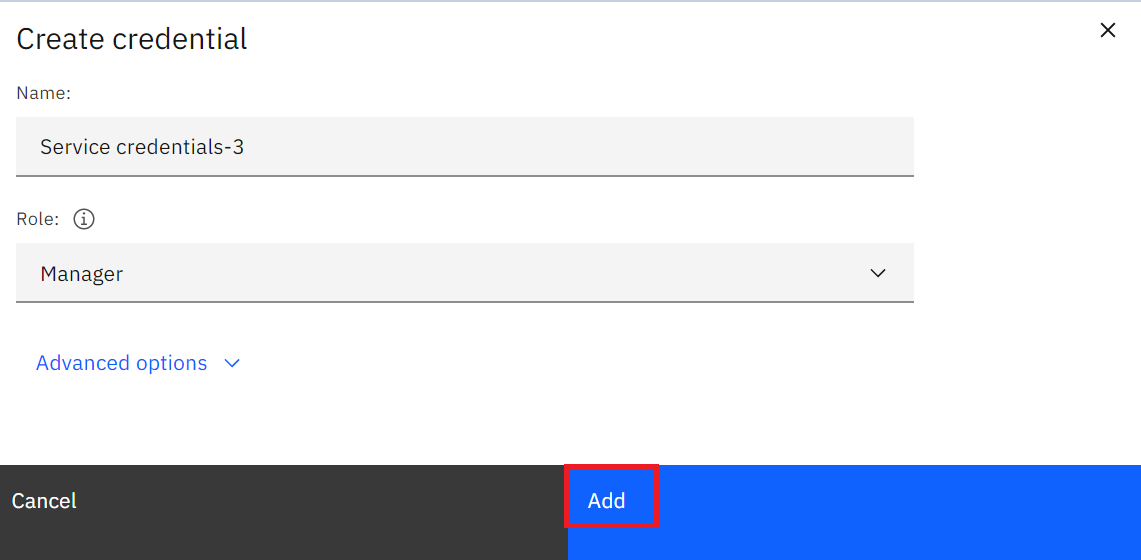

Check the box to View credentials
Copy and save the credentials making a note of the following:
port is the database port
db is the database name
host is the hostname of the database instance
username is the username you'll use to connect
password is the password you'll use to connect

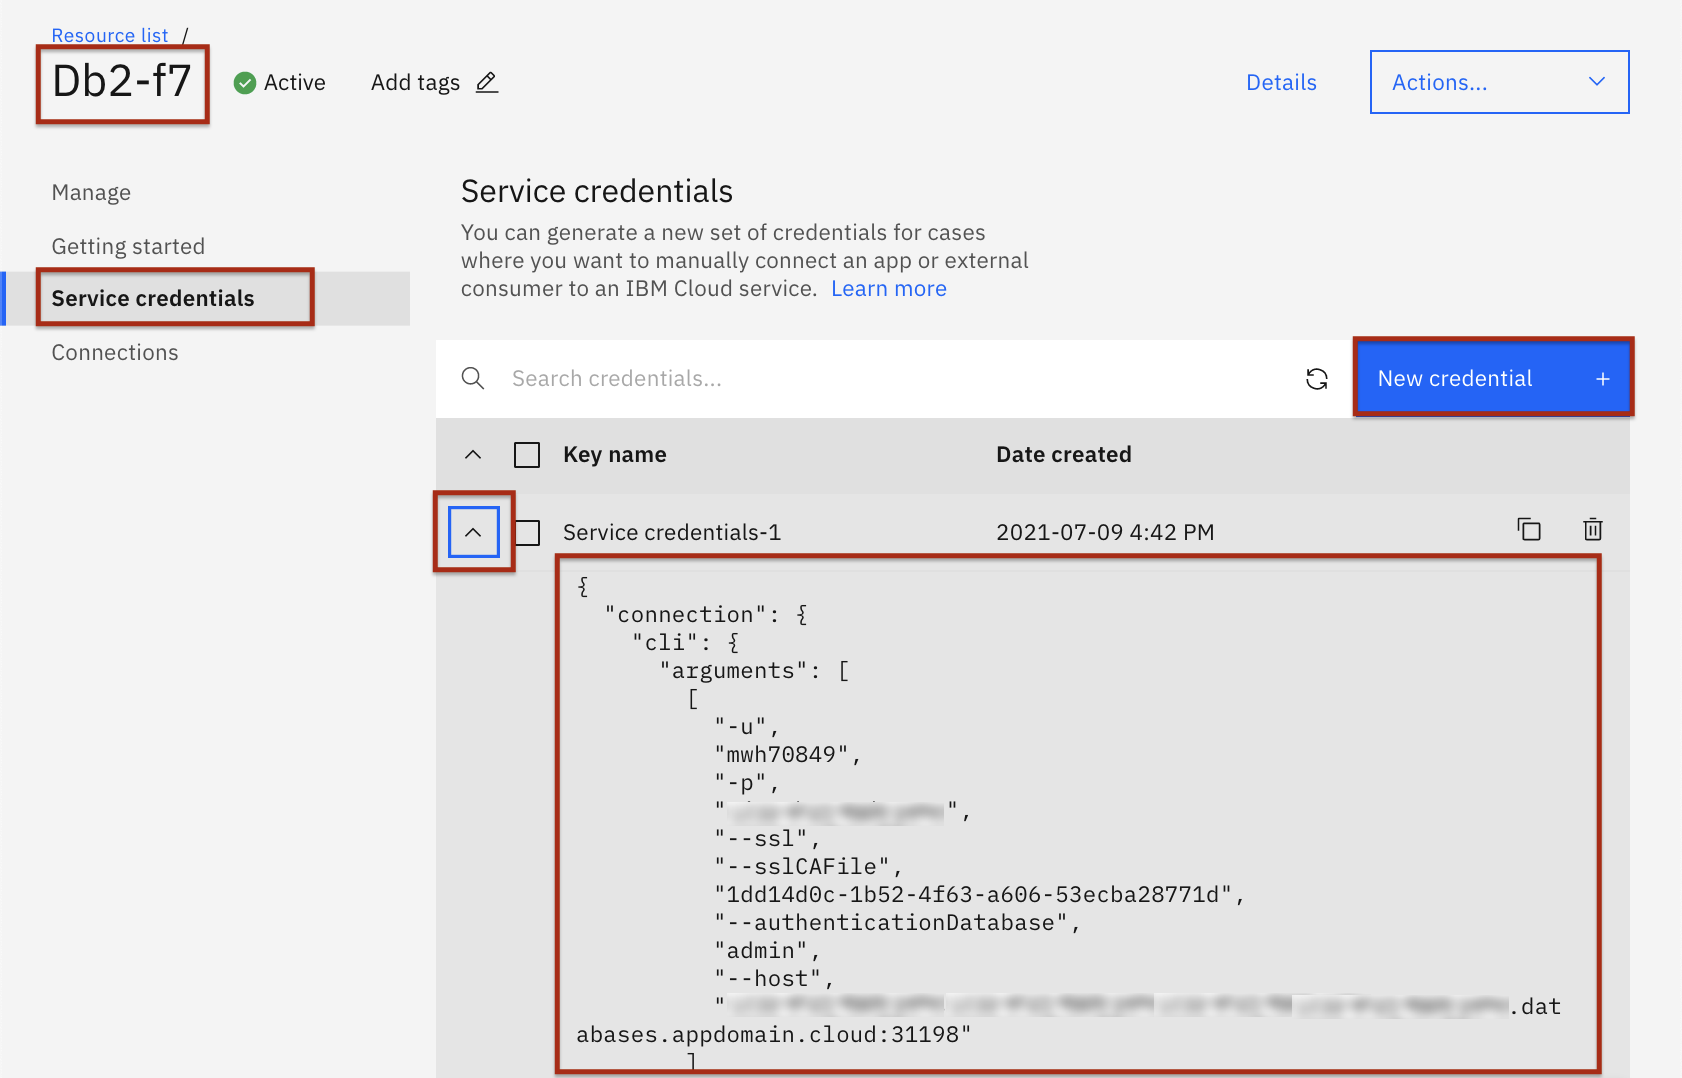

You need to scroll down to get the credentials details.

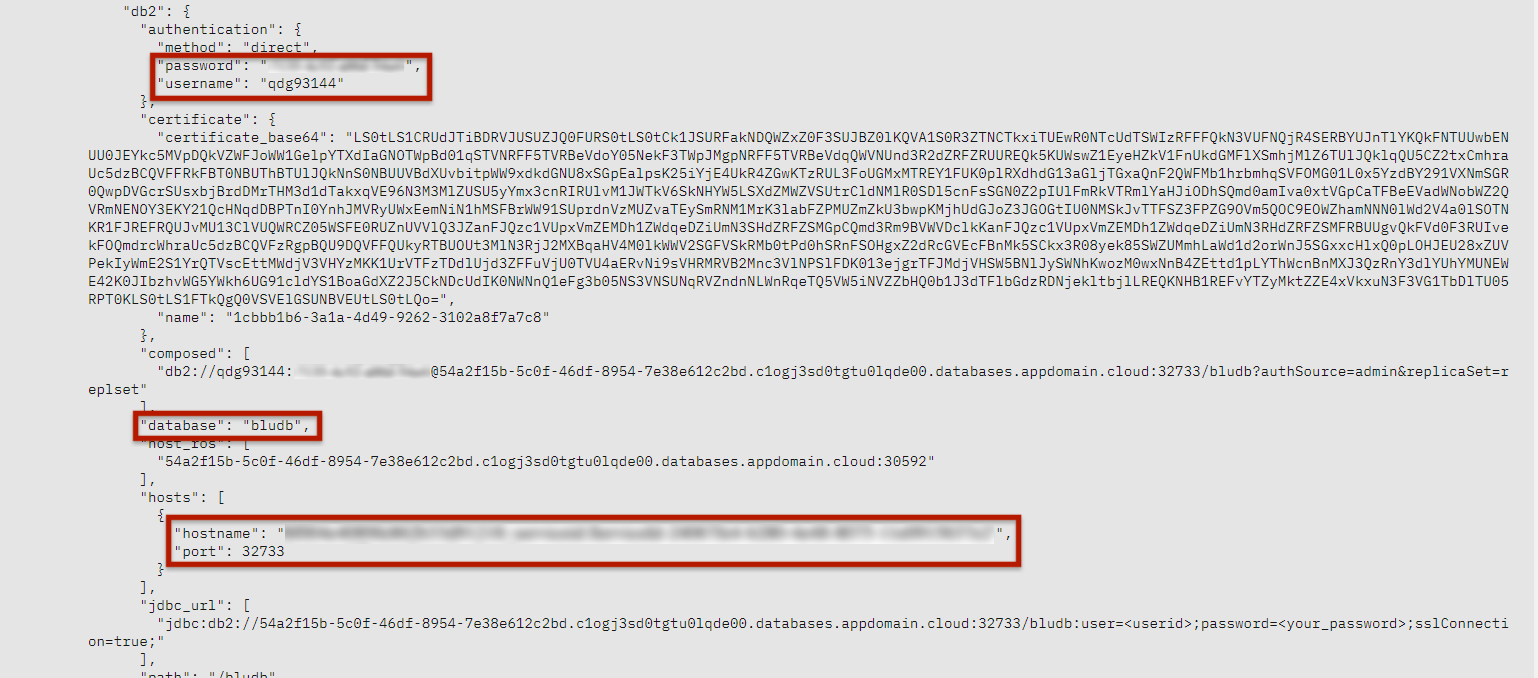


## Import the `ibm_db` Python library

The `ibm_db` [API ](https://pypi.python.org/pypi/ibm_db/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2022-01-01) provides a variety of useful Python functions for accessing and manipulating data in an IBM® data server database, including functions for connecting to a database, preparing and issuing SQL statements, fetching rows from result sets, calling stored procedures, committing and rolling back transactions, handling errors, and retrieving metadata.

We first import the ibm_db library into our Python Application


In [1]:

!pip install ibm_db ibm_db_sa

# Ensure we don't load_ext with sqlalchemy>=1.4 (incompadible)
!pip uninstall sqlalchemy==1.4 -y && pip install sqlalchemy==1.3.24
!pip install ipython-sql

Found existing installation: SQLAlchemy 1.3.24
Uninstalling SQLAlchemy-1.3.24:
  Successfully uninstalled SQLAlchemy-1.3.24
  Using cached SQLAlchemy-1.3.24-cp39-cp39-win_amd64.whl (1.2 MB)


In [2]:
import ibm_db

When the command above completes, the `ibm_db` library is loaded in your notebook.

## Identify the database connection credentials

Connecting to dashDB or DB2 database requires the following information:

*   Driver Name
*   Database name
*   Host DNS name or IP address
*   Host port
*   Connection protocol
*   User ID (or username)
*   User Password

Now enter your database credentials below and execute the cell with `Shift` + `Enter`


In [3]:
#Replace the placeholder values with your actual Db2 hostname, username, and password:
dsn_hostname = "54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud" # e.g.: "54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud"
dsn_uid = "hhf49271"        # e.g. "abc12345"
dsn_pwd = "Rrplpk5JraUR4qsg"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "bludb"            # e.g. "BLUDB"
dsn_port = "32733"                # e.g. "32733" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"
dsn_security = "SSL"              #i.e. "SSL"

## Create the DB2 database connection

Ibm_db API uses the IBM Data Server Driver for ODBC and CLI APIs to connect to IBM DB2 and Informix.

Lets build the dsn connection string using the credentials you entered above


In [4]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create the dsn connection string
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};"
    "SECURITY={7}").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd,dsn_security)

#print the connection string to check correct values are specified
print(dsn)

DRIVER={IBM DB2 ODBC DRIVER};DATABASE=bludb;HOSTNAME=54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud;PORT=32733;PROTOCOL=TCPIP;UID=hhf49271;PWD=Rrplpk5JraUR4qsg;SECURITY=SSL


Now establish the connection to the database


In [5]:
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
#Create database connection

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )


Connected to database:  bludb as user:  hhf49271 on host:  54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud


Congratulations if you were able to connect successfuly. Otherwise check the error and try again.


In [6]:
#Retrieve Metadata for the Database Server
server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)

DBMS_NAME:  DB2/LINUXX8664
DBMS_VER:   11.05.0700
DB_NAME:    BLUDB


In [7]:
#Retrieve Metadata for the Database Client / Driver
client = ibm_db.client_info(conn)

print ("DRIVER_NAME:          ", client.DRIVER_NAME) 
print ("DRIVER_VER:           ", client.DRIVER_VER)
print ("DATA_SOURCE_NAME:     ", client.DATA_SOURCE_NAME)
print ("DRIVER_ODBC_VER:      ", client.DRIVER_ODBC_VER)
print ("ODBC_VER:             ", client.ODBC_VER)
print ("ODBC_SQL_CONFORMANCE: ", client.ODBC_SQL_CONFORMANCE)
print ("APPL_CODEPAGE:        ", client.APPL_CODEPAGE)
print ("CONN_CODEPAGE:        ", client.CONN_CODEPAGE)

DRIVER_NAME:           DB2CLI.DLL
DRIVER_VER:            11.05.0600
DATA_SOURCE_NAME:      BLUDB
DRIVER_ODBC_VER:       03.51
ODBC_VER:              03.01.0000
ODBC_SQL_CONFORMANCE:  EXTENDED
APPL_CODEPAGE:         1252
CONN_CODEPAGE:         1208


## Close the Connection

We free all resources by closing the connection. Remember that it is always important to close connections so that we can avoid unused connections taking up resources.


In [8]:
ibm_db.close(conn)

True

## Summary

In this tutorial you established a connection to a DB2 database on Cloud database from a Python notebook using ibm_db API.


## Author

<a href="https://www.linkedin.com/in/ravahuja?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2022-01-01">Rav Ahuja</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2021-11-17        | 2.2     | Lakshmi    | Updated library                    |
| 2021-07-09        | 2.1     | Malika     | Updated the connection string      |
| 2020-08-28        | 2.0     | Lavanya    | Moved lab to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
